# Purpose
We are asking you to predict total sales for every product and store in the next month. 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy.stats import norm, skew
import seaborn as sns

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
# pd.set_option('display.expand_frame_repr', False)
sns.set(style="whitegrid", color_codes=True)

In [3]:
def get_basic(df):
    print(df.info())
    print(df.isnull().sum())
    df.head()

In [4]:
DATA_PATH = '../data/predict_future_sales/'

ITEM_FILENAME = 'items.csv'

ITEM_CAT_FILENAME = 'item_categories.csv'

TRAIN_FILENAME = 'sales_train.csv'

SHOP_FILENAME = 'shops.csv'

TEST_FILENAME = 'test.csv'

In [5]:
items = pd.read_csv(DATA_PATH + ITEM_FILENAME)
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_cats = pd.read_csv(DATA_PATH + ITEM_CAT_FILENAME)
item_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
train = pd.read_csv(DATA_PATH + TRAIN_FILENAME)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
shop = pd.read_csv(DATA_PATH + SHOP_FILENAME)
get_basic(shop)
shop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None
shop_name    0
shop_id      0
dtype: int64


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [72]:
test = pd.read_csv(DATA_PATH + TEST_FILENAME)
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [12]:
get_basic(items)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
item_name           0
item_id             0
item_category_id    0
dtype: int64


In [13]:
get_basic(item_cats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
item_category_name    0
item_category_id      0
dtype: int64


In [14]:
items_info = pd.merge(items, item_cats, on='item_category_id')
get_basic(items_info)
items_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 4 columns):
item_name             22170 non-null object
item_id               22170 non-null int64
item_category_id      22170 non-null int64
item_category_name    22170 non-null object
dtypes: int64(2), object(2)
memory usage: 866.0+ KB
None
item_name             0
item_id               0
item_category_id      0
item_category_name    0
dtype: int64


,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [15]:
train = pd.merge(train, shop, on='shop_id')
train = pd.merge(train, items_info, on='item_id')
get_basic(train)
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
shop_name             object
item_name             object
item_category_id      int64
item_category_name    object
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB
None
date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [23]:
train.loc[:,['item_price', 'item_cnt_day']].describe()

,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06
mean,8.908532e+02,1.242641e+00
std,1.729800e+03,2.618834e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


### item_cnt_day

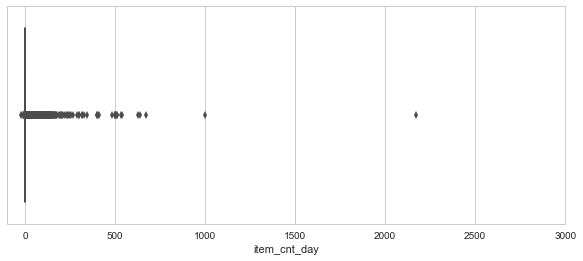

In [30]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

### item_price

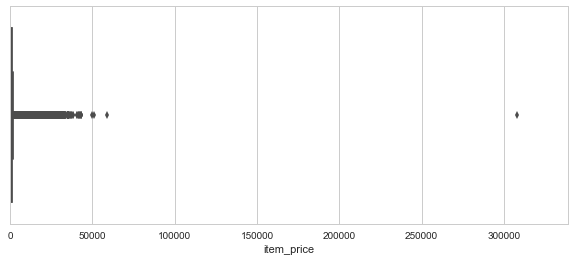

In [33]:
plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

### Outlier

In [44]:
print(len(f_train))
train_f1_drop = f_train[f_train.item_price<100000]
train_f1_drop = train_f1_drop[train_f1_drop.item_cnt_day<1001]

#output 
train_f1_drop.head()

2935849
2935847


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [45]:
###  item_price below zero

In [47]:
drop_outlier_train[drop_outlier_train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
212539,15.05.2013,4,32,2973,-1.0,1.0,"Москва ТЦ ""Серебряный Дом""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3


In [53]:
price_median = drop_outlier_train['item_price'].median()
drop_outlier_train.loc[drop_outlier_train.item_price<0, 'item_price'] = price_median
# verification
drop_outlier_train.loc[drop_outlier_train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name


In [55]:
# why we have item_cnt_day < 0 data?

In [54]:
drop_outlier_train[drop_outlier_train.item_cnt_day<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
982,27.12.2013,11,59,5613,5571.00,-1.0,"Ярославль ТЦ ""Альтаир""",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1050,24.04.2015,27,22,5613,6090.00,-1.0,Москва Магазин С21,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1083,21.04.2015,27,18,5613,6090.00,-1.0,"Красноярск ТЦ ""Июнь""",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1122,06.09.2014,20,28,5613,6090.00,-1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1129,17.02.2015,25,28,5613,6090.00,-1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1130,28.08.2015,31,28,5613,5481.00,-2.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1164,28.02.2014,13,29,5613,6090.00,-1.0,"Москва ТЦ ""Новый век"" (Новокосино)",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1195,05.08.2014,19,6,5613,5990.00,-1.0,"Воронеж (Плехановская, 13)",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1267,11.06.2015,29,12,5613,4198.00,-1.0,Интернет-магазин ЧС,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1304,11.04.2015,27,31,5613,5481.00,-1.0,"Москва ТЦ ""Семеновский""",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3


### Pivot Table

In [40]:
train_df1 = train.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
train_df1.head()

date_block_num    0     1    2    3    4    5    6    7    8    9  ...    24  \
shop_id item_id                                                    ...         
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [41]:
train_df1 = train_df1.reset_index()
train_df1['shop_id']= train_df1['shop_id'].astype('str')
train_df1['item_id']= train_df1['item_id'].astype('str')
train_df1.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
train_df1.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test

In [57]:
get_basic(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
ID         0
shop_id    0
item_id    0
dtype: int64


In [73]:
test['shop_id'] = test['shop_id'].astype('str')
test['item_id'] = test['item_id'].astype('str')

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null object
item_id    214200 non-null object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [75]:
test = test.merge(train_df1, how='left', on = ["shop_id", "item_id"])
test.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
test = test.fillna(0.0)

In [77]:
test.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
get_basic(test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 37 columns):
ID         214200 non-null int64
shop_id    214200 non-null object
item_id    214200 non-null object
0          214200 non-null float64
1          214200 non-null float64
2          214200 non-null float64
3          214200 non-null float64
4          214200 non-null float64
5          214200 non-null float64
6          214200 non-null float64
7          214200 non-null float64
8          214200 non-null float64
9          214200 non-null float64
10         214200 non-null float64
11         214200 non-null float64
12         214200 non-null float64
13         214200 non-null float64
14         214200 non-null float64
15         214200 non-null float64
16         214200 non-null float64
17         214200 non-null float64
18         214200 non-null float64
19         214200 non-null float64
20         214200 non-null float64
21         214200 non-null float64
22         214200 

### XGB Model 

In [70]:
import xgboost as xgb

In [52]:
def model_1(train, y_column_name):   
    param = {'max_depth':10, 
             'subsample':1,
             'min_child_weight':0.5,
             'eta':0.3, 
             'num_round':1000, 
             'seed':1,
             'silent':0,
             'eval_metric':'rmse'}

    progress = dict()
    xgbtrain = xgb.DMatrix(train.iloc[:,  (train.columns != y_column_name)].values, train.iloc[:, train.columns == y_column_name].values)
    watchlist  = [(xgbtrain,'train-rmse')]

    bst = xgb.train(param, xgbtrain)
    preds = bst.predict(xgb.DMatrix(train.iloc[:,  (train.columns != y_column_name)].values))
    from sklearn.metrics import mean_squared_error 
    rmse = np.sqrt(mean_squared_error(preds, train.iloc[:, train.columns == y_column_name].values))
    print("===========")
    print(rmse)
    print("===========")
    return bst

In [54]:
bst = model_1(train_df1, 33)

1.27045054712


In [93]:
type(test.columns.difference())

pandas.indexes.base.Index

In [95]:
test.loc[:, test.columns.difference([33, 'ID'])]

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,item_id,shop_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,5037,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5320,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,5233,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5232,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5268,5
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,5039,5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5041,5
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5046,5
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,5319,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5003,5


In [98]:
preds = bst.predict(xgb.DMatrix(test.iloc[:, (test.columns != 'ID') & (test.columns != 33)].values))

In [100]:
# Normalize prediction to [0-20]
preds = list(map(lambda x: min(20,max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID':test['ID'],'item_cnt_month': preds })
sub_df.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.246647
std,61834.358168,0.672844
min,0.000000,0.000000
25%,53549.750000,0.115680
50%,107099.500000,0.132294
75%,160649.250000,0.159988
max,214199.000000,20.000000


In [101]:
sub_df.to_csv('Submission_Predict Sales.csv',index=False)